In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from first_glance import report

In [ ]:
#Annual co2 emissions
#Co2 emissions by sector, cumulative and year by year
#Co2 emissions by country, cumulative and year by year
#Per capita co2 emissions
#percentage change by year, co2
#corelation with co2, gdp, population

In [2]:
# Initial look using first_glance stats_report
report.stats_report('global_co2.csv')

,entry_count,data_type,null_count,mean,std,min,25%,50%,75%,max
country,48058,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,48058,int64,0,1.926843e+03,5.941485e+01,1750.0,1.883000e+03,1.930000e+03,1.976000e+03,2.022000e+03
population,48058,float64,8563,6.083223e+07,3.285867e+08,222.0,3.464375e+05,2.456362e+06,1.008038e+07,7.975105e+09
gdp,48058,float64,33494,2.677586e+11,2.103151e+12,49980000.0,7.516679e+09,2.597999e+10,1.132942e+11,1.136302e+14
cement_co2,48058,float64,24294,9.109400e+00,6.646355e+01,0.0,0.000000e+00,2.900000e-02,8.340000e-01,1.692404e+03
co2,48058,float64,17750,3.912722e+02,1.855825e+03,0.0,1.830000e-01,3.856000e+00,4.727725e+01,3.714979e+04
coal_co2,48058,float64,22983,1.569639e+02,7.657201e+02,0.0,0.000000e+00,7.030000e-01,1.698800e+01,1.521930e+04
gas_co2,48058,float64,22975,5.127810e+01,3.160338e+02,0.0,0.000000e+00,0.000000e+00,1.344500e+00,7.922112e+03
oil_co2,48058,float64,22947,1.129207e+02,6.294511e+02,0.0,8.400000e-02,1.323000e+00,1.391600e+01,1.237795e+04
share_global_co2,48058,float64,19563,5.163432e+00,1.834465e+01,0.0,2.000000e-03,3.700000e-02,5.180000e-01,1.000000e+02


In [3]:
df = pd.read_csv('global_co2.csv')

In [44]:
# Creating a regex pattern to filter out specific entries from the DataFrame
exclude_list = ['World', 'Europe', 'countries', 'GCP', 'Asia', 'Africa', 'America', 'International']

# Join the list into a single regex pattern
pattern = '|'.join(exclude_list)

# Create a copy of the original DataFrame to work on
co2_df = df.copy()

# Filter the DataFrame to exclude rows where the 'country' column contains any of the patterns in exclude_list
co2_countries = co2_df[~co2_df['country'].str.contains(pattern, na=False, case=False, regex=True)]

In [45]:
co2_df

,country,year,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,share_global_co2
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,15052191.0,2.271535e+10,0.558,10.715,6.097,0.0,4.060,0.029
48054,Zimbabwe,2019,15354606.0,NaN,0.473,9.775,5.571,0.0,3.731,0.026
48055,Zimbabwe,2020,15669663.0,NaN,0.496,7.850,4.309,0.0,3.045,0.022
48056,Zimbabwe,2021,15993525.0,NaN,0.531,8.396,4.548,0.0,3.317,0.023


In [5]:
def cumulative_co2(direction: str, entry_count: int) -> pd.DataFrame:
    """
    Returns a DataFrame containing the cumulative CO2 emissions for the specified number of countries.

    Parameters:
    direction (str): Specifies whether to return the top or bottom entries by CO2 emissions. Must be either 'top' or 'bottom'.
    entry_count (int): The number of countries to include in the result. Must be a positive integer.

    Returns:
    pd.DataFrame: A DataFrame with the cumulative CO2 emissions for the specified number of countries.

    Raises:
    ValueError: If the 'direction' parameter is not 'top' or 'bottom'.
    ValueError: If the 'entry_count' parameter is not a positive integer.
    """
    # Validate direction parameter
    if direction not in {'top', 'bottom'}:
        raise ValueError('Invalid value for direction. Please select "top" or "bottom".')
    
    # Validate entry_count parameter
    if entry_count <= 0:
        raise ValueError('Entry_count must be a positive integer')

    # Filter out rows with null CO2 values and group by country
    df = co2_df[co2_df['co2'].notnull()].groupby('country').sum()[['co2']]

    # Retrieve the top or bottom entries
    if direction == 'top':
        return df.nlargest(entry_count, 'co2').reset_index()
    elif direction == 'bottom':
        return df.nsmallest(entry_count, 'co2').reset_index()

In [46]:
cumulative_co2('top', 10)

,country,co2
0,United States,426914.556
1,China,260619.243
2,Russia,119290.814
3,Germany,93985.871
4,United Kingdom,78834.706
5,Japan,67734.911
6,India,59740.694
7,France,39397.693
8,Canada,34613.228
9,Ukraine,30961.508


In [7]:
cumulative_co2('bottom', 10)

,country,co2
0,Antarctica,0.157
1,Niue,0.300
2,Tuvalu,0.303
3,Saint Helena,0.429
4,Wallis and Futuna,0.798
5,Christmas Island,1.333
6,Montserrat,1.634
7,Kiribati,2.149
8,Cook Islands,2.560
9,Anguilla,3.332


In [8]:
def percent_calc(df:pd.DataFrame, calculations:dict):
    for new_col_name, (minor_col, total_col) in calculations.items():
        df[new_col_name] = round(df[minor_col]/ df[total_col]*100, 2)
    return df
    
calculations = {'coal_prct': ('coal_co2', 'co2'),
                'oil_prct': ('oil_co2', 'co2'),
                'gas_prct': ('gas_co2', 'co2'),
                'cement_prct': ('cement_co2', 'co2')}

In [9]:
co2_df = percent_calc(co2_df, calculations)

In [10]:
co2_df

,country,year,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,share_global_co2,coal_prct,oil_prct,gas_prct,cement_prct
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,15052191.0,2.271535e+10,0.558,10.715,6.097,0.0,4.060,0.029,56.90,37.89,0.0,5.21
48054,Zimbabwe,2019,15354606.0,NaN,0.473,9.775,5.571,0.0,3.731,0.026,56.99,38.17,0.0,4.84
48055,Zimbabwe,2020,15669663.0,NaN,0.496,7.850,4.309,0.0,3.045,0.022,54.89,38.79,0.0,6.32
48056,Zimbabwe,2021,15993525.0,NaN,0.531,8.396,4.548,0.0,3.317,0.023,54.17,39.51,0.0,6.32


In [11]:
# Creating a co2 per capita column
co2_df.loc[:,'co2_per_capita'] = round((co2_df['co2']*1e6) / co2_df['population'],2)
co2_df[co2_df['co2'].notnull()][['year', 'country', 'co2', 'co2_per_capita']].reset_index(drop=True)

,year,country,co2,co2_per_capita
0,1949,Afghanistan,0.015,0.00
1,1950,Afghanistan,0.084,0.01
2,1951,Afghanistan,0.092,0.01
3,1952,Afghanistan,0.092,0.01
4,1953,Afghanistan,0.106,0.01
...,...,...,...,...
23940,2018,Zimbabwe,10.715,0.71
23941,2019,Zimbabwe,9.775,0.64
23942,2020,Zimbabwe,7.850,0.50
23943,2021,Zimbabwe,8.396,0.52


In [12]:
def per_cap_by_year(direction: str, entry_count: int, year: int) -> pd.DataFrame:
    """
    Returns a DataFrame containing the per capita CO2 emissions for a specified year,
    and the specified number of countries, either top or bottom.

    Parameters:
    direction (str): Specifies whether to return the top or bottom entries by per capita CO2 emissions. Must be either 'top' or 'bottom'.
    entry_count (int): The number of countries to include in the result. Must be a positive integer.
    year (int): The year for which to retrieve the data. Must be less than 2023.

    Returns:
    pd.DataFrame: A DataFrame with the per capita CO2 emissions for the specified number of countries for the given year.

    Raises:
    ValueError: If the 'direction' parameter is not 'top' or 'bottom'.
    ValueError: If the 'entry_count' parameter is not a positive integer.
    ValueError: If the 'year' parameter is not less than 2023.
    """
    # Validate parameters
    if direction not in {'top', 'bottom'}:
        raise ValueError('Invalid value for direction. Please select "top" or "bottom".')
    
    if entry_count <= 0:
        raise ValueError('Entry_count must be a positive integer')
    
    if year >= 2023:
        raise ValueError('Year must be less than 2023')

    # Filter the DataFrame for the specified year and non-null CO2 values
    df = co2_df[(co2_df['year'] == year) & (co2_df['co2'].notnull())]

    # Retrieve the top or bottom entries by per capita CO2 emissions
    if direction == 'top':
        return df.nlargest(entry_count, 'co2_per_capita').reset_index(drop=True)
    elif direction == 'bottom':
        return df.nsmallest(entry_count, 'co2_per_capita').reset_index(drop=True)

In [13]:
per_cap_by_year('top', 15, 2020)

,country,year,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,share_global_co2,coal_prct,oil_prct,gas_prct,cement_prct,co2_per_capita
0,Qatar,2020,2760390.0,NaN,1.362,102.501,0.000,86.818,12.524,0.293,0.00,12.22,84.70,1.33,37.13
1,Bahrain,2020,1477478.0,NaN,0.213,37.396,0.000,33.130,3.609,0.107,0.00,9.65,88.59,0.57,25.31
2,Brunei,2020,441736.0,NaN,0.000,11.102,2.132,5.331,3.353,0.032,19.20,30.20,48.02,0.00,25.13
3,United Arab Emirates,2020,9287286.0,NaN,5.204,216.768,8.086,132.351,69.331,0.619,3.73,31.98,61.06,2.40,23.34
4,Trinidad and Tobago,2020,1518142.0,NaN,0.245,35.030,0.000,30.964,3.444,0.100,0.00,9.83,88.39,0.70,23.07
5,Kuwait,2020,4360451.0,NaN,1.187,97.712,0.000,51.688,43.448,0.279,0.00,44.47,52.90,1.21,22.41
6,New Caledonia,2020,286412.0,NaN,0.028,5.109,2.714,0.000,2.367,0.015,53.12,46.33,0.00,0.55,17.84
7,Saudi Arabia,2020,35997108.0,NaN,25.593,610.773,0.432,261.062,319.430,1.745,0.07,52.30,42.74,4.19,16.97
8,Australia,2020,25670052.0,NaN,2.820,396.685,156.681,83.480,135.380,1.133,39.50,34.13,21.04,0.71,15.45
9,Sint Maarten (Dutch part),2020,43638.0,NaN,0.000,0.652,0.000,0.000,0.652,0.002,0.00,100.00,0.00,0.00,14.94


In [14]:
per_cap_by_year('bottom', 10, 2020)

,country,year,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,share_global_co2,coal_prct,oil_prct,gas_prct,cement_prct,co2_per_capita
0,Democratic Republic of Congo,2020,92853168.0,NaN,0.498,3.710,0.027,0.000,2.748,0.011,0.73,74.07,0.00,13.42,0.04
1,Somalia,2020,16537018.0,NaN,NaN,0.597,0.000,0.000,0.597,0.002,0.00,100.00,0.00,NaN,0.04
2,Burundi,2020,12220229.0,NaN,0.003,0.736,0.026,0.000,0.707,0.002,3.53,96.06,0.00,0.41,0.06
3,Malawi,2020,19377058.0,NaN,0.240,1.871,0.220,0.000,1.411,0.005,11.76,75.41,0.00,12.83,0.10
4,Rwanda,2020,13146367.0,NaN,0.163,1.372,0.011,0.088,1.110,0.004,0.80,80.90,6.41,11.88,0.10
5,Niger,2020,24333644.0,NaN,0.032,2.817,0.359,0.073,2.283,0.008,12.74,81.04,2.59,1.14,0.12
6,Sierra Leone,2020,8233973.0,NaN,0.000,1.026,0.000,0.000,1.026,0.003,0.00,100.00,0.00,0.00,0.12
7,Uganda,2020,44404608.0,NaN,0.559,5.538,0.000,0.000,4.979,0.016,0.00,89.91,0.00,10.09,0.12
8,Chad,2020,16644707.0,NaN,0.151,2.279,0.000,0.000,1.847,0.007,0.00,81.04,0.00,6.63,0.14
9,Madagascar,2020,28225182.0,NaN,0.058,3.964,1.374,0.000,2.532,0.011,34.66,63.87,0.00,1.46,0.14


In [15]:
def country_per_cap_co2(country: str) -> pd.DataFrame:
    """
    Retrieves the CO2 and per capita CO2 emissions data for a specified country.

    Parameters:
    country (str): The name of the country to retrieve data for. Must be a string.

    Returns:
    pd.DataFrame: A DataFrame containing the CO2 emissions data for the specified country, 
                  including columns for 'country', 'year', 'co2', and 'co2_per_capita'.

    Raises:
    ValueError: If the 'country' parameter is not a string.
    ValueError: If the specified country does not exist within the dataset.
    """
    
    # Check if the country parameter is a string
    if not isinstance(country, str):
        raise ValueError('Country parameter must be a string')
    
    # Create a set of valid country names from the DataFrame
    countries = set(co2_df['country'])
    
    # Check if the specified country exists in the dataset
    if country not in countries:
        raise ValueError(f'Country "{country}" does not exist within the given dataset')
    
    # Filter the DataFrame for the specified country and non-null per capita CO2 values
    data = co2_df[(co2_df['country'] == country) & (co2_df['co2_per_capita'].notnull())]
    
    # Return the relevant columns, resetting the index
    return data[['country', 'year', 'co2', 'co2_per_capita']].reset_index(drop=True)

In [16]:
country_per_cap_co2('China')

,country,year,co2,co2_per_capita
0,China,1907,19.894,0.05
1,China,1908,22.736,0.06
2,China,1909,24.252,0.06
3,China,1910,25.009,0.06
4,China,1911,24.631,0.06
...,...,...,...,...
111,China,2018,10353.935,7.31
112,China,2019,10721.042,7.54
113,China,2020,10914.012,7.66
114,China,2021,11336.233,7.95


In [17]:
yearly_percent_co2 = co2_df.groupby('year').sum()[['co2', 'coal_co2', 'gas_co2', 'oil_co2', 'cement_co2']].reset_index()

In [18]:
yearly_percent_co2 = percent_calc(yearly_percent_co2, calculations)

In [19]:
yearly_percent_co2

,year,co2,coal_co2,gas_co2,oil_co2,cement_co2,coal_prct,oil_prct,gas_prct,cement_prct
0,1750,9.306,9.306,0.000,0.000,0.000,100.00,0.00,0.00,0.00
1,1751,9.407,9.407,0.000,0.000,0.000,100.00,0.00,0.00,0.00
2,1752,9.505,9.505,0.000,0.000,0.000,100.00,0.00,0.00,0.00
3,1753,9.610,9.610,0.000,0.000,0.000,100.00,0.00,0.00,0.00
4,1754,9.734,9.734,0.000,0.000,0.000,100.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
268,2018,35538.526,14547.832,7576.130,11117.849,1563.782,40.94,31.28,21.32,4.40
269,2019,35780.375,14463.708,7702.224,11234.266,1613.848,40.42,31.40,21.53,4.51
270,2020,34161.185,14016.962,7638.874,10160.826,1631.247,41.03,29.74,22.36,4.78
271,2021,35919.743,14783.961,7999.139,10722.817,1690.462,41.16,29.85,22.27,4.71


In [20]:
countries_demo = co2_df[co2_df['co2'].notnull()][['country', 'year', 'population', 'gdp', 'co2']]

In [21]:
def country_demo(country:str)->pd.DataFrame:
    """
    Filters and returns a dataframe containing demographic data for a specified country.
    
    This function takes the name of a country as input, validates if the country exists 
    in the dataframe, and filters the `countries_demo` dataframe to include only rows 
    where the 'country' column matches the given country name and the 'population' 
    column is not null. The resulting dataframe is reset to remove the old index 
    and the 'index' column is dropped. If the country does not exist or there is no 
    data for the specified country, a ValueError is raised.

    Parameters:
    country (str): The name of the country to filter the dataframe by.

    Returns:
    pd.DataFrame: A dataframe containing the demographic data for the specified country 
                  with the index reset and 'index' column removed.

    Raises:
    ValueError: If the specified country does not exist in the dataframe or if no data 
                is found for the specified country.
    """
    
    # Validate if the country exists in the dataframe
    countries = set(countries_demo['country'])
    if country not in countries:
        raise ValueError(f'{country} does not exist within given dataframe')

    # Filter the dataframe
    df = countries_demo.loc[(countries_demo['country'] == country) & (countries_demo['population'].notnull())]

    # Check if the filtered dataframe is empty
    if df.empty:
        raise ValueError(f'No data found for {country}')

    # Reset the index and drop the old index column
    df = df.reset_index().drop(columns='index')

    return df

In [22]:
china_info = country_demo('China')
canada_info = country_demo('Canada')
us_info = country_demo('United States')
russia_info = country_demo('Russia')

In [23]:
def yearly_prct_chng(df:pd.DataFrame, column_creation:dict, prct_calculations:dict)->pd.DataFrame:
    for new_column, orig_column in column_creation.items():
        df[new_column] = df[orig_column].shift(1)
    for new_column, (current_year, last_year) in prct_calculations.items():
        df[new_column] = round((df[current_year] - df[last_year])/df[current_year]*100, 2)
    return df[['country', 'year', 'population', 'pop_prct_chng', 'gdp', 'gdp_prct_chng','co2', 'co2_prct_chng']]

In [24]:
column_creation = {'last_population': 'population',
                     'last_gdp': 'gdp',
                     'last_co2' : 'co2'}
prct_calculations = {'pop_prct_chng': ('population', 'last_population'),
                     'gdp_prct_chng': ('gdp', 'last_gdp'),
                     'co2_prct_chng': ('co2', 'last_co2')}

In [25]:
yearly_prct_chng(canada_info, column_creation, prct_calculations)

,country,year,population,pop_prct_chng,gdp,gdp_prct_chng,co2,co2_prct_chng
0,Canada,1790,816556.0,NaN,NaN,NaN,0.004,NaN
1,Canada,1800,500000.0,-63.31,NaN,NaN,0.004,0.00
2,Canada,1801,512396.0,2.42,NaN,NaN,0.004,0.00
3,Canada,1802,525100.0,2.42,NaN,NaN,0.004,0.00
4,Canada,1803,538119.0,2.42,NaN,NaN,0.004,0.00
...,...,...,...,...,...,...,...,...
219,Canada,2018,37035260.0,1.30,1.669402e+12,1.97,577.066,1.80
220,Canada,2019,37522584.0,1.30,NaN,NaN,578.588,0.26
221,Canada,2020,37888704.0,0.97,NaN,NaN,522.845,-10.66
222,Canada,2021,38155012.0,0.70,NaN,NaN,537.174,2.67


In [30]:
total_co2_by_year = co2_df.groupby('year').sum().reset_index()[['year', 'co2']]
total_co2_by_year = total_co2_by_year[total_co2_by_year['year'] >= 2000]
china_info = china_info[china_info['year'] >= 2000]
canada_info = canada_info[canada_info['year'] >= 2000]
us_info = us_info[us_info['year'] >= 2000]
russia_info = russia_info[russia_info['year'] >= 2000]

In [33]:
co2_plot_data = co2_df[['year', 'country', 'co2']]

In [39]:
co2_plot_data = co2_plot_data[(co2_plot_data['co2'].notnull()) & (co2_plot_data['year'] == 2020) & (co2_plot_data['country'].isin(['Canada', 'United States', 'China', 'Russia']))]

In [40]:
co2_plot_data

,year,country,co2
8082,2020,Canada,522.845
9120,2020,China,10914.012
36423,2020,Russia,1632.929
45776,2020,United States,4714.628


/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: F

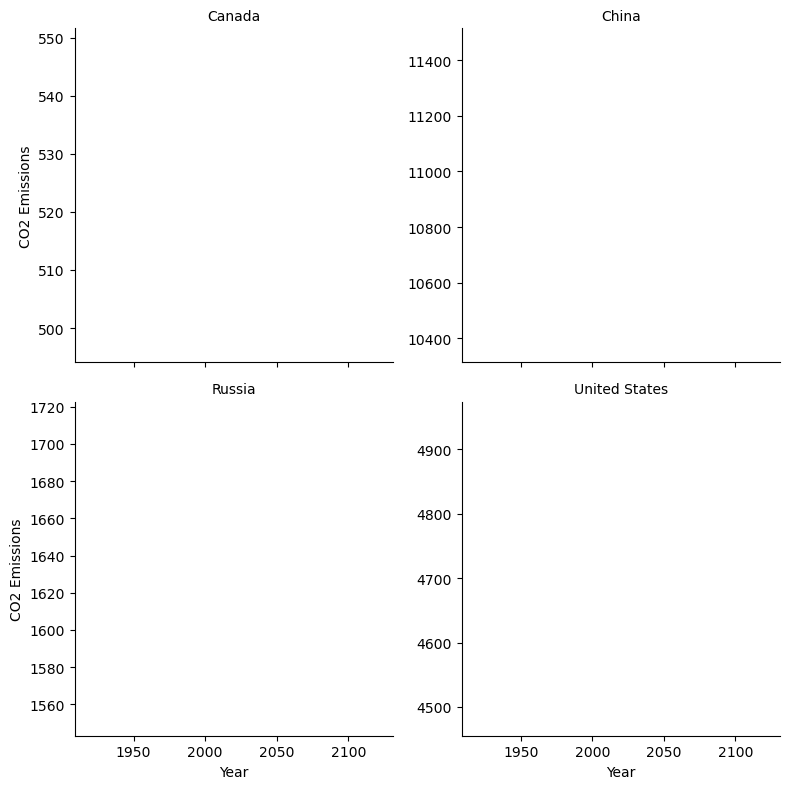

In [41]:
g = sns.FacetGrid(co2_plot_data, col='country', col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'year', 'co2')
g.set_axis_labels('Year', 'CO2 Emissions')
g.set_titles('{col_name}')

# Adjust the plot to fit the titles and labels
plt.tight_layout()

# Show the plot
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: F

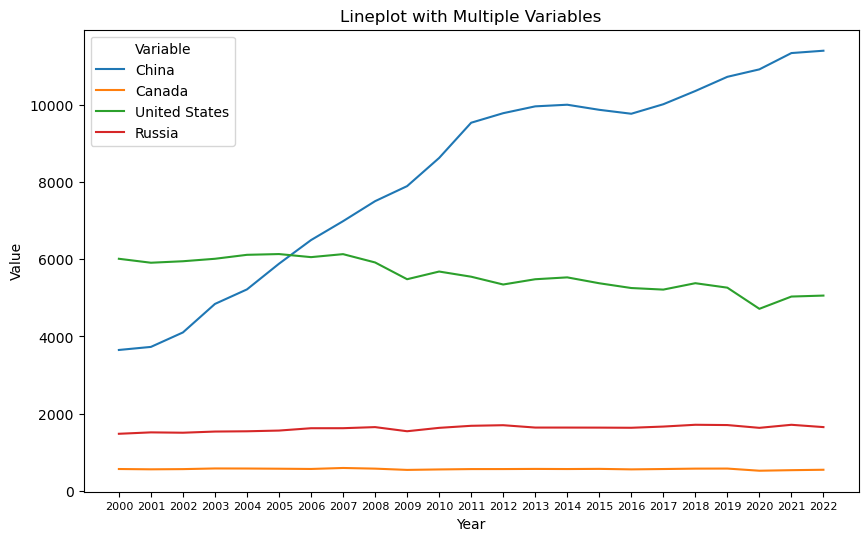

In [28]:
# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each line
sns.lineplot(data=china_info, x='year', y='co2', label='China')
sns.lineplot(data=canada_info, x='year', y='co2', label='Canada')
sns.lineplot(data=us_info, x='year', y='co2', label='United States')
sns.lineplot(data=russia_info, x='year', y='co2', label='Russia')
plt.xticks(total_co2_by_year['year'], fontsize=8)
# Add titles and labels
plt.title('Lineplot with Multiple Variables')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Variable')
plt.show()